In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images / 255.0 
test_images = test_images / 255.0 
train_images = train_images.reshape(-1, 28, 28, 1) 
test_images = test_images.reshape(-1, 28, 28, 1) 
model = Sequential([ 
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    MaxPooling2D((2, 2)), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(64, activation='relu'), 
    Dropout(0.5), 
    Dense(10, activation='softmax') 
])

In [3]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
 
history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 29s 37ms/step - loss: 0.3920 - accuracy: 0.8792 - val_loss: 0.0747 - val_accuracy: 0.9785
Epoch 2/5
750/750 [==============================] - 27s 37ms/step - loss: 0.1448 - accuracy: 0.9574 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 27s 36ms/step - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.0481 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 27s 37ms/step - loss: 0.0866 - accuracy: 0.9740 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 28s 37ms/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.0400 - val_accuracy: 0.9886


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"\n Test accuracy: {test_acc:.4f}") 
print(f" Test loss: {test_loss:.4f}") 

313/313 [==============================] - 4s 12ms/step - loss: 0.0293 - accuracy: 0.9905

 Test accuracy: 0.9905
 Test loss: 0.0293


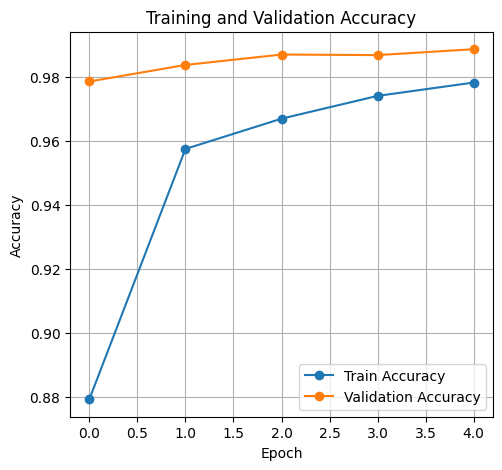

In [5]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.grid(True)

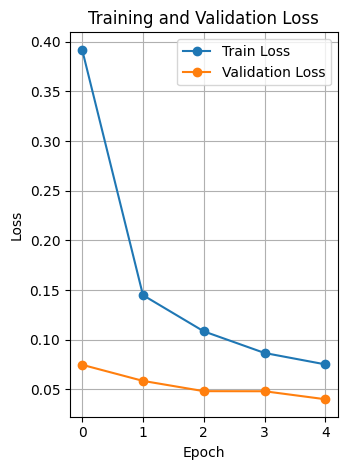

In [6]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss', marker='o') 
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [7]:
predictions = model.predict(test_images) 
predicted_labels = np.argmax(predictions, axis=1) 

313/313 [==============================] - 4s 12ms/step


In [8]:
num_samples = 10 
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

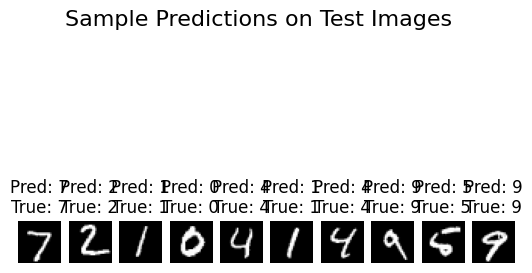

In [9]:
for i in range(num_samples): 
    plt.subplot(1, num_samples, i + 1) 
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}") 
    plt.axis('off') 
plt.suptitle("Sample Predictions on Test Images", fontsize=16) 
plt.show()